## 네이버 날씨 미세먼지 가져오기 웹 크롤링 - bs4, requests 사용하기

### 1) 웹 페이지 가져오기

https://search.naver.com/search.naver?query=%EB%82%A0%EC%94%A8

In [33]:
from bs4 import BeautifulSoup as bs
import urllib as ul
import requests
import pandas as pd

In [34]:
html = requests.get('https://search.naver.com/search.naver?query=날씨')


### 2) 파싱

In [36]:
soup = bs(html.text, 'html.parser')

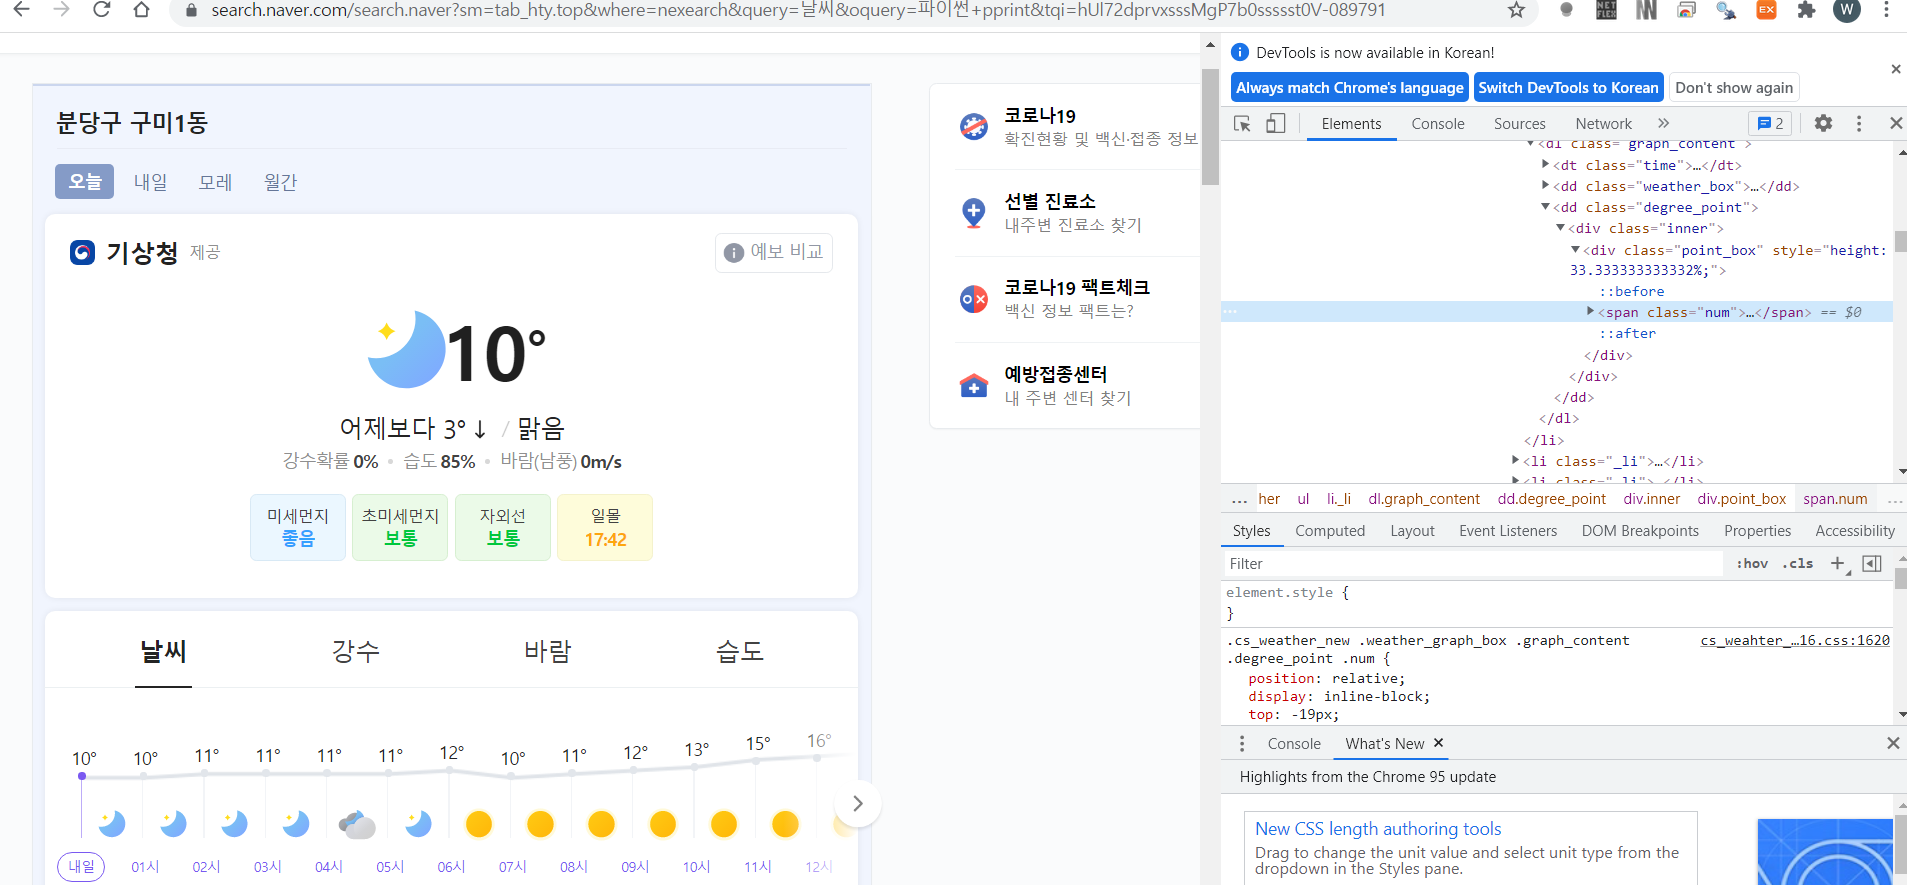

### 3) 요소 1개 찾기(find)

#### -  미세먼지 정보가 있는 div 요소만 추출

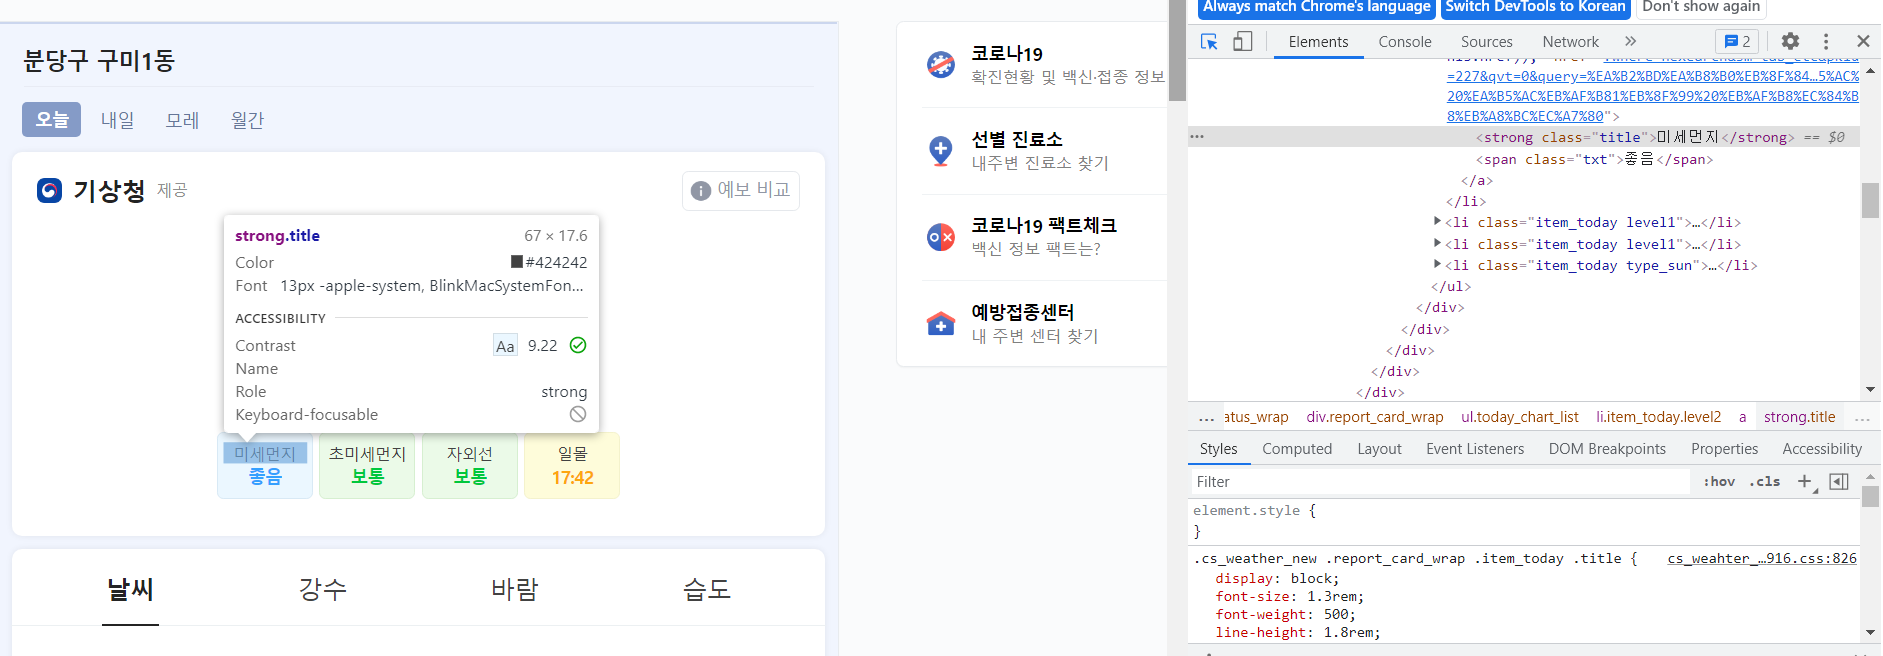

### 4) 내부 텍스트 추출

In [123]:
# li정보가 총 4개 이므로, 모두 가져오기를 위해서 findAll
report_title = []
reports = soup.find('ul', {'today_chart_list'}).find_all('li')
for i in reports:    
    report_title.append(i.text)

print(report_title)

['  미세먼지 좋음  ', '  초미세먼지 좋음  ', '  자외선 보통  ', '  일몰 17:39  ']


### 5) 미세먼지 추출

In [124]:
# 미세먼지 추출
print(report_title[0])

  미세먼지 좋음  


### 6) 초미세먼지 추출

In [125]:
# 초미세먼지 추출
print(report_title[1])

  초미세먼지 좋음  


### 7) 자외선 추출

In [126]:
# 자외선 추출
print(report_title[2])

  자외선 보통  


### 8) 일몰 추출

In [127]:
# 일몰 추출
print(report_title[3])

  일몰 17:39  


# 추가) 강수량, 습도, 바람 정보 추출

### 1) 내부 텍스트 추출

In [128]:
summary_desc = []
summary_term = []
summary_list = []

for i in soup.find('dl', {'summary_list'}).find_all("dd"):
    summary_desc.append(i.text)

for j in soup.find('dl', {'summary_list'}).find_all("dt"):
    summary_term.append(j.text)
    
print(summary_desc)
print(summary_term)

summary_list = list(zip(summary_desc, summary_term))
print(summary_list)

['0%', '38%', '1m/s']
['강수확률', '습도', '바람(서풍)']
[('0%', '강수확률'), ('38%', '습도'), ('1m/s', '바람(서풍)')]


In [129]:
# 강수량 추출
print(summary_list[0][1], ":", summary_list[0][0])

강수확률 : 0%


In [130]:
# 습도 추출
print(summary_list[1][1], ":", summary_list[1][0])

습도 : 38%


In [131]:
# 바람 추출
print(summary_list[2][1], ":", summary_list[2][0])

바람(서풍) : 1m/s


1) 실습과제 : 위에서 추출한 내용을 csv 파일로 저장해서 제출하기
    - 미세먼지, 초미세먼지 ~ 강수량, 습도, 바람 등

2) 실습과제 : 온도를 찾아서 추출하고 온도 정보와 1번 정보를 합쳐서 통합 csv파일로 저장하기

3) 실습과제 : 시간대별 날씨 추출하고 csv파일로 저장하기

In [146]:
f = open('weather1.csv', 'w')
for i in report_title:
    f.write(i+"\n")
f.close()